In [1]:
import warnings 
warnings.filterwarnings("ignore")
import os
import shutil
import glob

In [2]:
ORG_DIR="C:/Users/pr503/Projects/Skin Cancer/Dataset/melanoma_cancer_dataset/"
TRAIN_DIR="C:/Users/pr503/Projects/Skin Cancer/Dataset/melanoma_cancer_dataset/train/"
TEST_DIR="C:/Users/pr503/Projects/Skin Cancer/Dataset/melanoma_cancer_dataset/test/"
CLASS = ['benign', 'malignant']

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input 
from keras.preprocessing.image import ImageDataGenerator
import keras

In [12]:
base_model=InceptionV3(input_shape=(256,256,3), include_top= False)

In [13]:
for layer in base_model.layers: 
    layer.trainable = False

In [14]:
X = Flatten()(base_model.output) 
X = Dense (units=2, activation= 'sigmoid')(X)
model= Model(base_model.input, X)
model.compile(optimizer='adam', loss = keras. losses.binary_crossentropy, metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 127, 127, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 127, 127, 32)         96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 127, 127, 32)         0         ['batch_normalization_94

                                                                                                  
 conv2d_105 (Conv2D)         (None, 29, 29, 32)           6144      ['average_pooling2d_9[0][0]'] 
                                                                                                  
 batch_normalization_99 (Ba  (None, 29, 29, 64)           192       ['conv2d_99[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_101 (B  (None, 29, 29, 64)           192       ['conv2d_101[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_104 (B  (None, 29, 29, 96)           288       ['conv2d_104[0][0]']          
 atchNorma

 )                                                                  ]']                           
                                                                                                  
 activation_111 (Activation  (None, 29, 29, 96)           0         ['batch_normalization_111[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_112 (Activation  (None, 29, 29, 64)           0         ['batch_normalization_112[0][0
 )                                                                  ]']                           
                                                                                                  
 mixed1 (Concatenate)        (None, 29, 29, 288)          0         ['activation_106[0][0]',      
                                                                     'activation_108[0][0]',      
          

 )                                                                  ]']                           
                                                                                                  
 conv2d_122 (Conv2D)         (None, 29, 29, 96)           55296     ['activation_121[0][0]']      
                                                                                                  
 batch_normalization_122 (B  (None, 29, 29, 96)           288       ['conv2d_122[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_122 (Activation  (None, 29, 29, 96)           0         ['batch_normalization_122[0][0
 )                                                                  ]']                           
                                                                                                  
 conv2d_12

                                                                                                  
 conv2d_124 (Conv2D)         (None, 14, 14, 192)          147456    ['mixed3[0][0]']              
                                                                                                  
 conv2d_127 (Conv2D)         (None, 14, 14, 192)          172032    ['activation_126[0][0]']      
                                                                                                  
 conv2d_132 (Conv2D)         (None, 14, 14, 192)          172032    ['activation_131[0][0]']      
                                                                                                  
 conv2d_133 (Conv2D)         (None, 14, 14, 192)          147456    ['average_pooling2d_12[0][0]']
                                                                                                  
 batch_normalization_124 (B  (None, 14, 14, 192)          576       ['conv2d_124[0][0]']          
 atchNorma

 activation_141 (Activation  (None, 14, 14, 160)          0         ['batch_normalization_141[0][0
 )                                                                  ]']                           
                                                                                                  
 average_pooling2d_13 (Aver  (None, 14, 14, 768)          0         ['mixed4[0][0]']              
 agePooling2D)                                                                                    
                                                                                                  
 conv2d_134 (Conv2D)         (None, 14, 14, 192)          147456    ['mixed4[0][0]']              
                                                                                                  
 conv2d_137 (Conv2D)         (None, 14, 14, 192)          215040    ['activation_136[0][0]']      
                                                                                                  
 conv2d_14

 atchNormalization)                                                                               
                                                                                                  
 activation_146 (Activation  (None, 14, 14, 160)          0         ['batch_normalization_146[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_151 (Activation  (None, 14, 14, 160)          0         ['batch_normalization_151[0][0
 )                                                                  ]']                           
                                                                                                  
 average_pooling2d_14 (Aver  (None, 14, 14, 768)          0         ['mixed5[0][0]']              
 agePooling2D)                                                                                    
          

                                                                                                  
 batch_normalization_156 (B  (None, 14, 14, 192)          576       ['conv2d_156[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_161 (B  (None, 14, 14, 192)          576       ['conv2d_161[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_156 (Activation  (None, 14, 14, 192)          0         ['batch_normalization_156[0][0
 )                                                                  ]']                           
                                                                                                  
 activatio

 )                                                                  ]']                           
                                                                                                  
 conv2d_165 (Conv2D)         (None, 6, 6, 320)            552960    ['activation_164[0][0]']      
                                                                                                  
 conv2d_169 (Conv2D)         (None, 6, 6, 192)            331776    ['activation_168[0][0]']      
                                                                                                  
 batch_normalization_165 (B  (None, 6, 6, 320)            960       ['conv2d_165[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_169 (B  (None, 6, 6, 192)            576       ['conv2d_169[0][0]']          
 atchNorma

                                                                                                  
 batch_normalization_178 (B  (None, 6, 6, 192)            576       ['conv2d_178[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_170 (Activation  (None, 6, 6, 320)            0         ['batch_normalization_170[0][0
 )                                                                  ]']                           
                                                                                                  
 mixed9_0 (Concatenate)      (None, 6, 6, 768)            0         ['activation_172[0][0]',      
                                                                     'activation_173[0][0]']      
                                                                                                  
 concatena

                                                                                                  
 activation_186 (Activation  (None, 6, 6, 384)            0         ['batch_normalization_186[0][0
 )                                                                  ]']                           
                                                                                                  
 batch_normalization_187 (B  (None, 6, 6, 192)            576       ['conv2d_187[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_179 (Activation  (None, 6, 6, 320)            0         ['batch_normalization_179[0][0
 )                                                                  ]']                           
                                                                                                  
 mixed9_1 

In [15]:
train_datagen=ImageDataGenerator(featurewise_center=True, 
                                 rotation_range=8.4, 
                                 width_shift_range= 0.3, 
                                 horizontal_flip=True, 
                                 preprocessing_function=preprocess_input,
                                 zoom_range= 0.4,
                                 shear_range = 8.4)

In [16]:
train_data = train_datagen.flow_from_directory(directory=TRAIN_DIR, target_size=(256,256), batch_size=36)

Found 9605 images belonging to 2 classes.


In [17]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

mc=ModelCheckpoint(filepath="./best_model.h5",monitor="accuracy",verbose=1,save_best_only= True )

es=EarlyStopping (monitor="accuracy",min_delta=0.01,patience=5,verbose= 1)

cb = [mc,es]

In [18]:
his= model.fit_generator (train_data, steps_per_epoch=100, epochs= 25, callbacks= cb)

Epoch 1/25
100/100 [==============================] - ETA: 0s - loss: 0.9268 - accuracy: 0.8088
Epoch 1: accuracy improved from -inf to 0.80879, saving model to .\best_model.h5
100/100 [==============================] - 99s 919ms/step - loss: 0.9268 - accuracy: 0.8088
Epoch 2/25
100/100 [==============================] - ETA: 0s - loss: 0.7498 - accuracy: 0.8317
Epoch 2: accuracy improved from 0.80879 to 0.83167, saving model to .\best_model.h5
100/100 [==============================] - 82s 817ms/step - loss: 0.7498 - accuracy: 0.8317
Epoch 3/25
100/100 [==============================] - ETA: 0s - loss: 0.8423 - accuracy: 0.8366
Epoch 3: accuracy improved from 0.83167 to 0.83663, saving model to .\best_model.h5
100/100 [==============================] - 82s 814ms/step - loss: 0.8423 - accuracy: 0.8366
Epoch 4/25
100/100 [==============================] - ETA: 0s - loss: 0.9854 - accuracy: 0.8397
Epoch 4: accuracy improved from 0.83663 to 0.83972, saving model to .\best_model.h5
100/100

In [19]:
from keras.models import load_model
model = load_model("best_model.h5")

h = his.history
h.keys()

dict_keys(['loss', 'accuracy'])

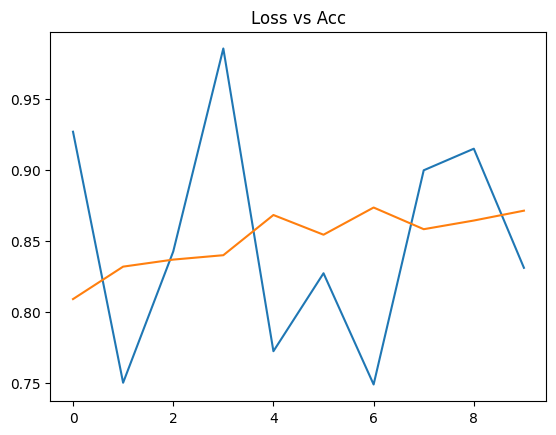

In [20]:
plt.plot(h['loss'])
plt.plot(h['accuracy'])
plt.title("Loss vs Acc")
plt.show()

1/1 [==============================] - 0s 44ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


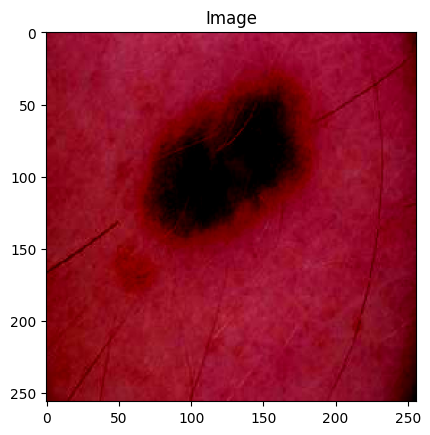

Benign


In [37]:
from keras.preprocessing.image import load_img , img_to_array

path="C:/Users/pr503/Projects/Skin Cancer/test5.jpg"
img = load_img(path, target_size=(256,256))

i=img_to_array(img)
i=preprocess_input(i)
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

plt.imshow(input_arr[0])
plt.title("Image")
plt.axis= False
plt.show()

if pred==0:
    print("Benign")
else:
    print("Malignant")
    